In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential

import tensorflow.keras.layers.experimental.preprocessing as layersprep

In [2]:
data_dir = "dataset"
img_height = 64
img_width = 64
batch_size = 32

In [3]:
data_dir = pathlib.Path(data_dir)
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

Found 168 files belonging to 6 classes.
Using 135 files for training.
Found 168 files belonging to 6 classes.
Using 33 files for validation.
['A', 'B', 'C', 'D', 'E', 'F']
(32, 64, 64, 3)
(32,)


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.07450981 1.0


In [ ]:
layer_sizes = ((8, 8, 8), (16, 16, 16), (32, 32, 32), (64, 64, 64), (16, 32, 64), (64, 32, 16))
histories = []
for ls in layer_sizes:
    model = Sequential([
        layersprep.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(ls[0], 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(ls[1], 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(ls[2], 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    epochs=20
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs
    )
    histories.append(history)

In [7]:
epochs_range = range(epochs)

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
for i, history in enumerate(histories):
    acc = history.history['accuracy']
    plt.plot(epochs_range, acc, label=layer_sizes[i])
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(2, 2, 2)
for i, history in enumerate(histories):
    val_acc = history.history['val_accuracy']
    plt.plot(epochs_range, val_acc, label=layer_sizes[i])
plt.legend(loc='lower right')
plt.title('Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(2, 2, 3)
for i, history in enumerate(histories):
    loss = history.history['loss']
    plt.plot(epochs_range, loss, label=layer_sizes[i])
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(2, 2, 4)
for i, history in enumerate(histories):
    val_loss = history.history['val_loss']
    plt.plot(epochs_range, val_loss, label=layer_sizes[i])
plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
layer_sizes = ((8, 8), (16, 16), (32, 32), (64, 64), (8, 64), (64, 8))
histories = []
for ls in layer_sizes:
    model = Sequential([
        layersprep.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(ls[0], 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(ls[1], 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    epochs=20
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs
    )
    histories.append(history)

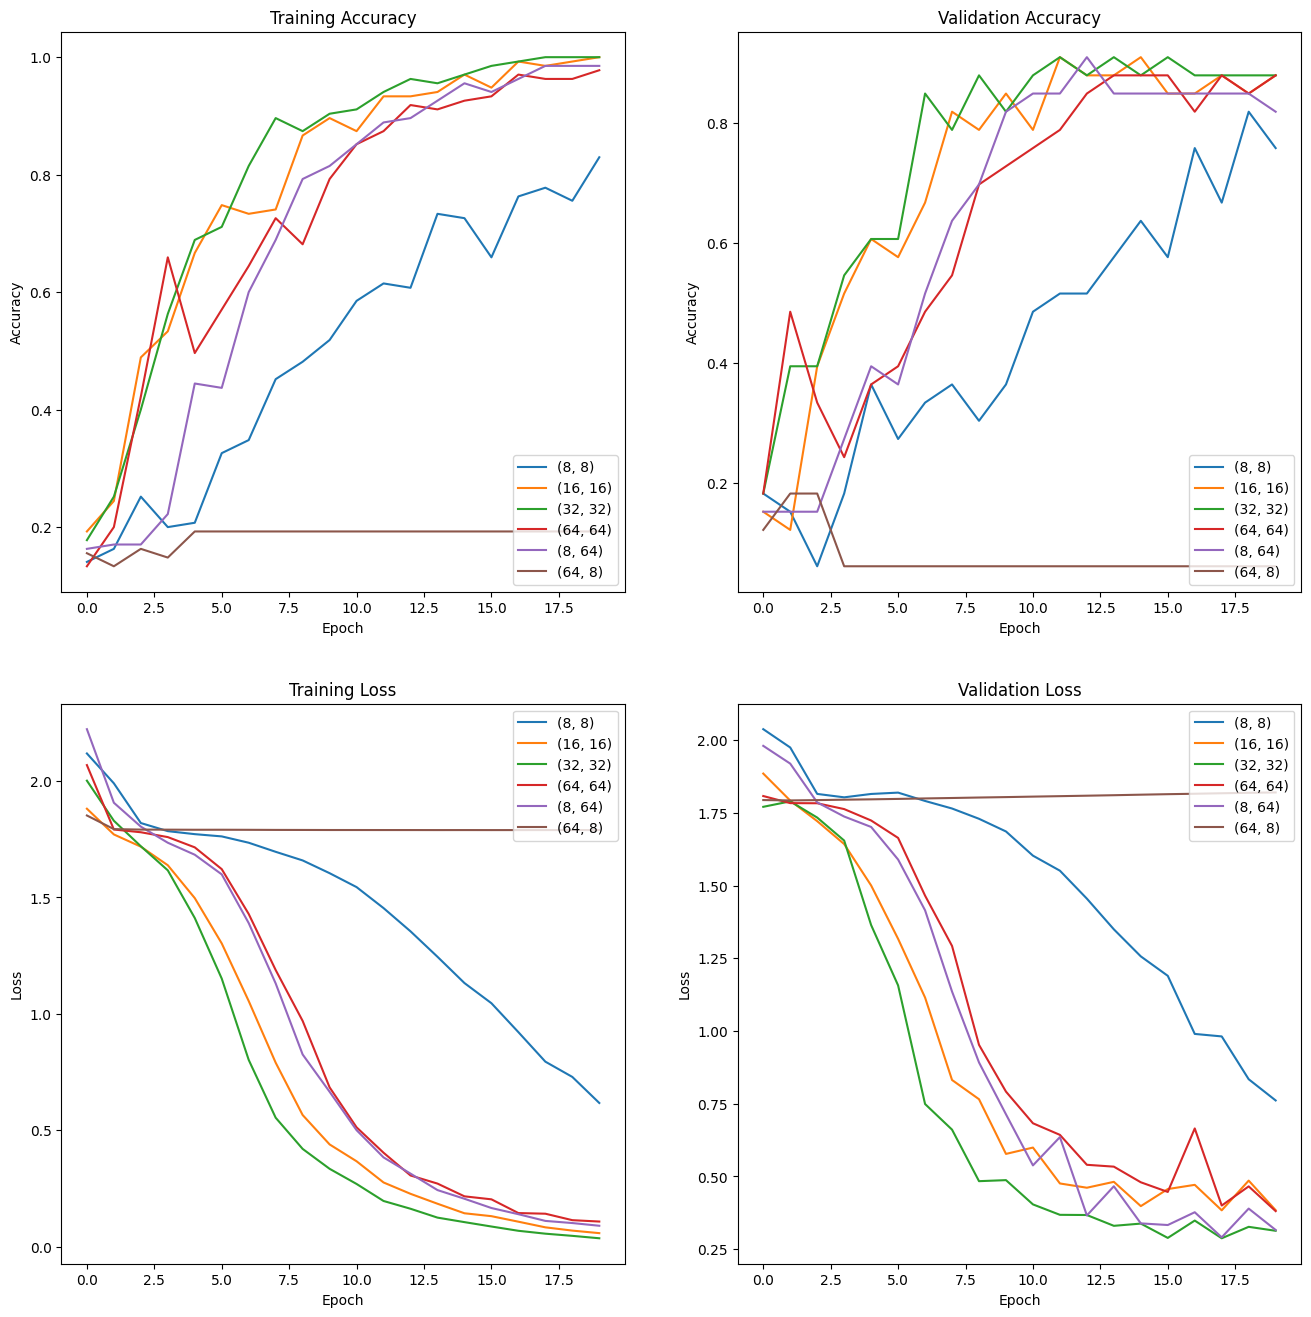

In [9]:
epochs_range = range(epochs)

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
for i, history in enumerate(histories):
    acc = history.history['accuracy']
    plt.plot(epochs_range, acc, label=layer_sizes[i])
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(2, 2, 2)
for i, history in enumerate(histories):
    val_acc = history.history['val_accuracy']
    plt.plot(epochs_range, val_acc, label=layer_sizes[i])
plt.legend(loc='lower right')
plt.title('Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(2, 2, 3)
for i, history in enumerate(histories):
    loss = history.history['loss']
    plt.plot(epochs_range, loss, label=layer_sizes[i])
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(2, 2, 4)
for i, history in enumerate(histories):
    val_loss = history.history['val_loss']
    plt.plot(epochs_range, val_loss, label=layer_sizes[i])
plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
layer_sizes = ([8], (8, 8), (8, 8, 8), [64], (64, 64), (64, 64, 64))
histories = []
for ls in layer_sizes:
    model = Sequential([
        layersprep.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    ])

    for s in ls:
        model.add(layers.Conv2D(s, 3, padding='same', activation='relu'))
        model.add(layers.MaxPooling2D())

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes))
    

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    epochs=20
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs
    )
    histories.append(history)

In [11]:
epochs_range = range(epochs)

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
for i, history in enumerate(histories):
    acc = history.history['accuracy']
    plt.plot(epochs_range, acc, label=layer_sizes[i])
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(2, 2, 2)
for i, history in enumerate(histories):
    val_acc = history.history['val_accuracy']
    plt.plot(epochs_range, val_acc, label=layer_sizes[i])
plt.legend(loc='lower right')
plt.title('Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(2, 2, 3)
for i, history in enumerate(histories):
    loss = history.history['loss']
    plt.plot(epochs_range, loss, label=layer_sizes[i])
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(2, 2, 4)
for i, history in enumerate(histories):
    val_loss = history.history['val_loss']
    plt.plot(epochs_range, val_loss, label=layer_sizes[i])
plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()